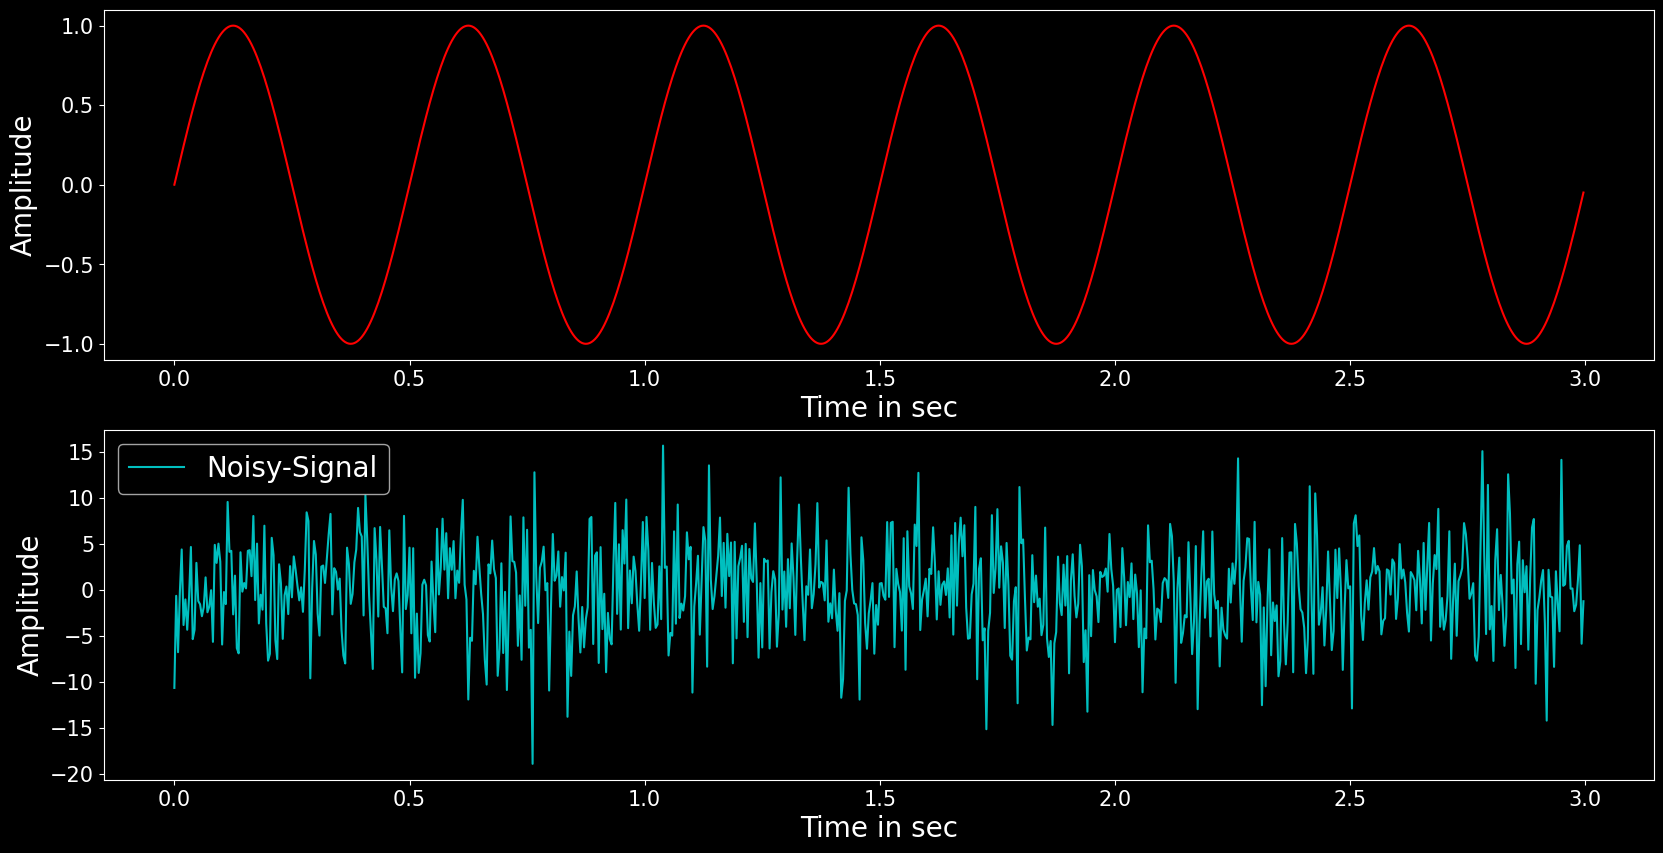

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
srate=256
t=np.arange(0,3,1/srate)
pnts=len(t)
x=np.sin(2*np.pi*2*t)
noise=5*np.random.randn(pnts)
noisy_sig=x+noise
plt.figure(figsize=(20,10))
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
style.use('dark_background')
plt.subplot(2,1,1)
plt.plot(t,x,'r',label='Clean-signal')
plt.xlabel('Time in sec',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.subplot(2,1,2)
plt.plot(t,noisy_sig,'c',label='Noisy-Signal')
plt.xlabel('Time in sec',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.legend(fontsize=20)
plt.show()


In [34]:
noisy_sig.shape #Noisy sig containing 768 samples


(768,)

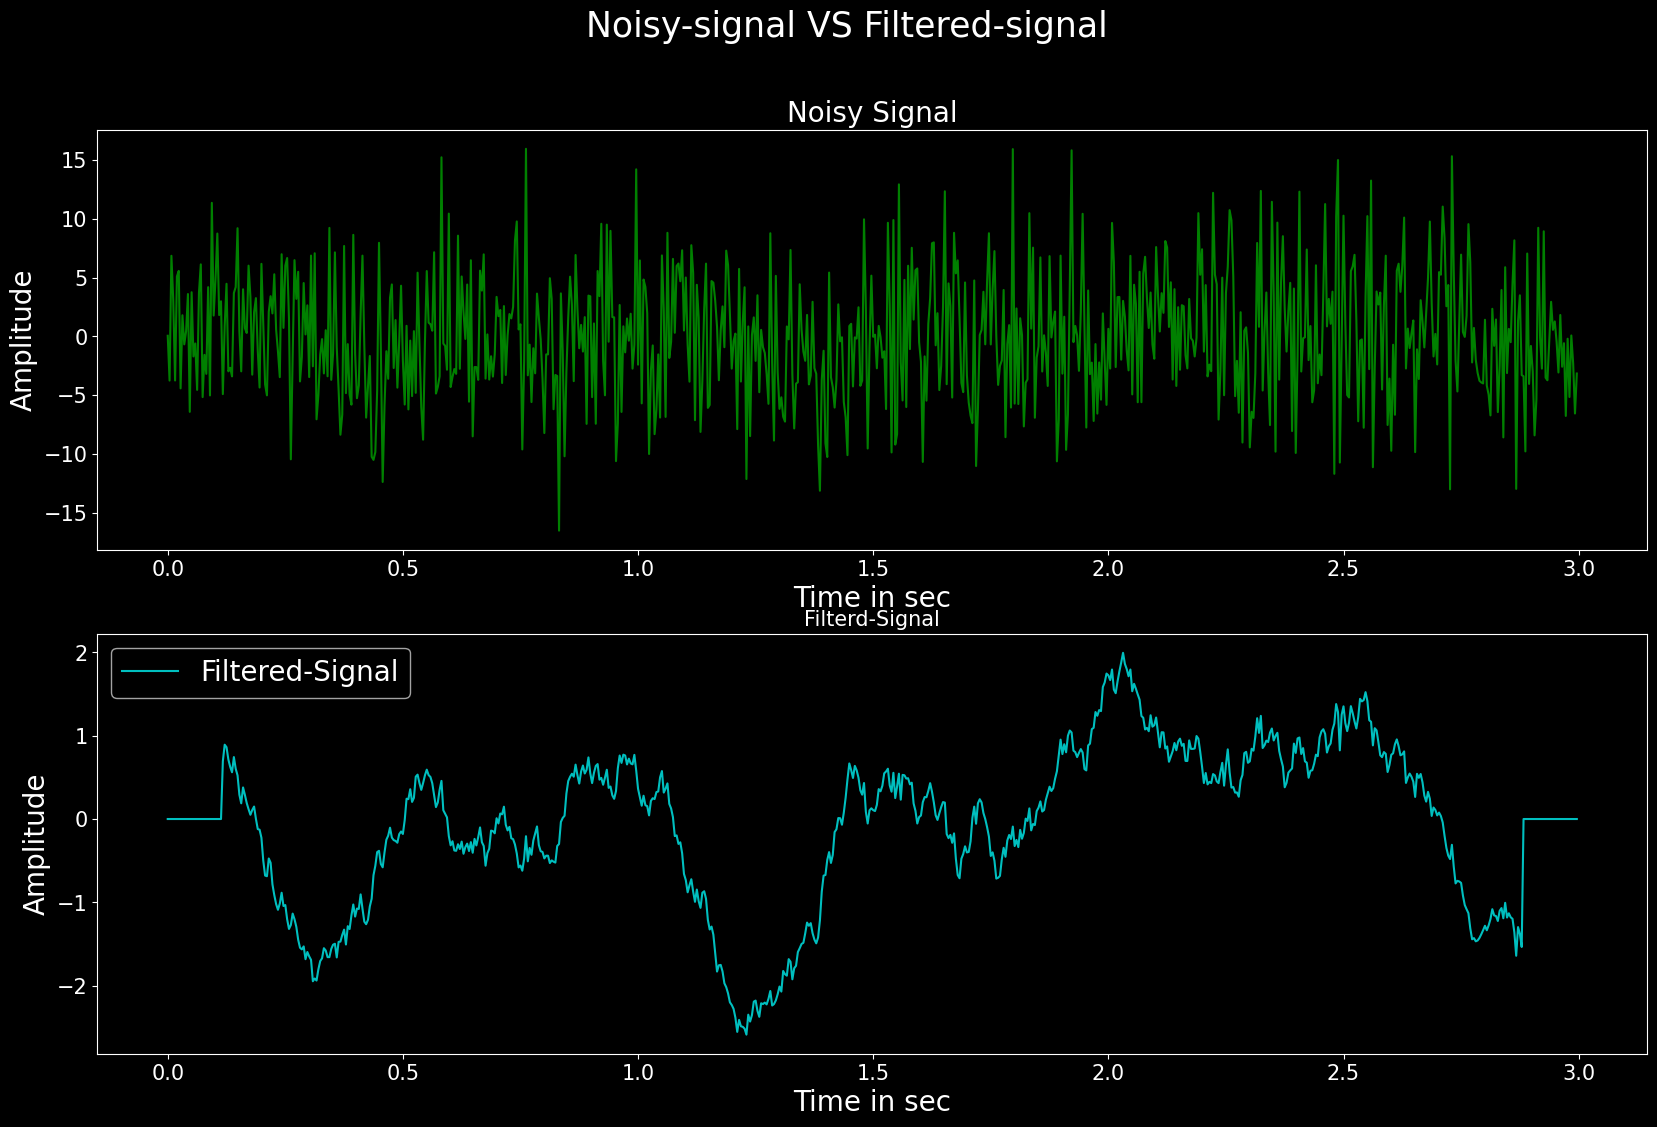

In [35]:
#Moving Average Filter
rate=256
t=np.arange(0,3,1/srate)
pnts=len(t)
x=np.sin(2*np.pi*2*t)
noise=5*np.random.randn(pnts)
noisy_sig=x+noise
N=30
filt_sig=np.zeros(noisy_sig.shape[0]) #generation 768 zeros
for i in range(N,pnts-N):
    filt_sig[i]=np.mean(noisy_sig[i:(2*N+1)+i])
plt.figure(figsize=(20,12))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.suptitle('Noisy-signal VS Filtered-signal',fontsize=25)
plt.subplot(2,1,1)
plt.plot(t,noisy_sig,'g',label='Noisy-Signal')
plt.title('Noisy Signal',fontsize=20)
plt.xlabel('Time in sec',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.subplot(2,1,2)
plt.plot(t,filt_sig,'c',label='Filtered-Signal')
plt.title('Filterd-Signal',fontsize=15)
plt.xlabel('Time in sec',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.legend(fontsize=20)
plt.show() #due to unavailabilty of samples at last, it needs 30 samples after last sample




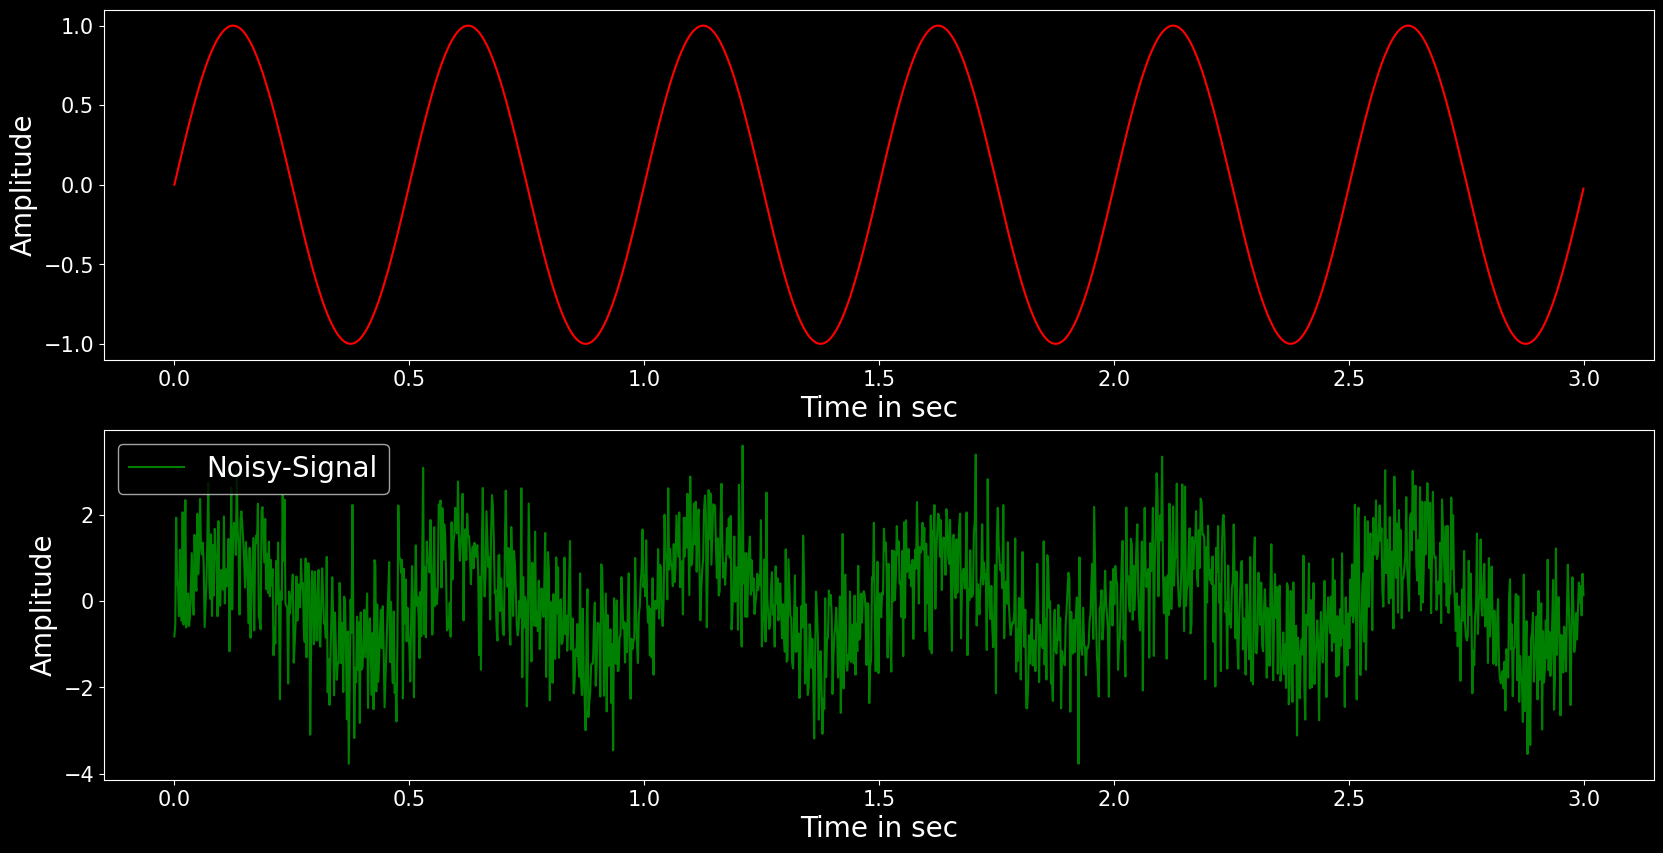

In [36]:
#Guassian Mean Filter
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
srate1=512
t=np.arange(0,3,1/srate1)
pnts=len(t)
x=np.sin(2*np.pi*2*t)
noise=np.random.randn(pnts)
noisy_sig=x+noise
plt.figure(figsize=(20,10))
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
style.use('dark_background')
plt.subplot(2,1,1)
plt.plot(t,x,'r',label='Clean-signal')
plt.xlabel('Time in sec',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.subplot(2,1,2)
plt.plot(t,noisy_sig,'g',label='Noisy-Signal')
plt.xlabel('Time in sec',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.legend(fontsize=20)
plt.show()


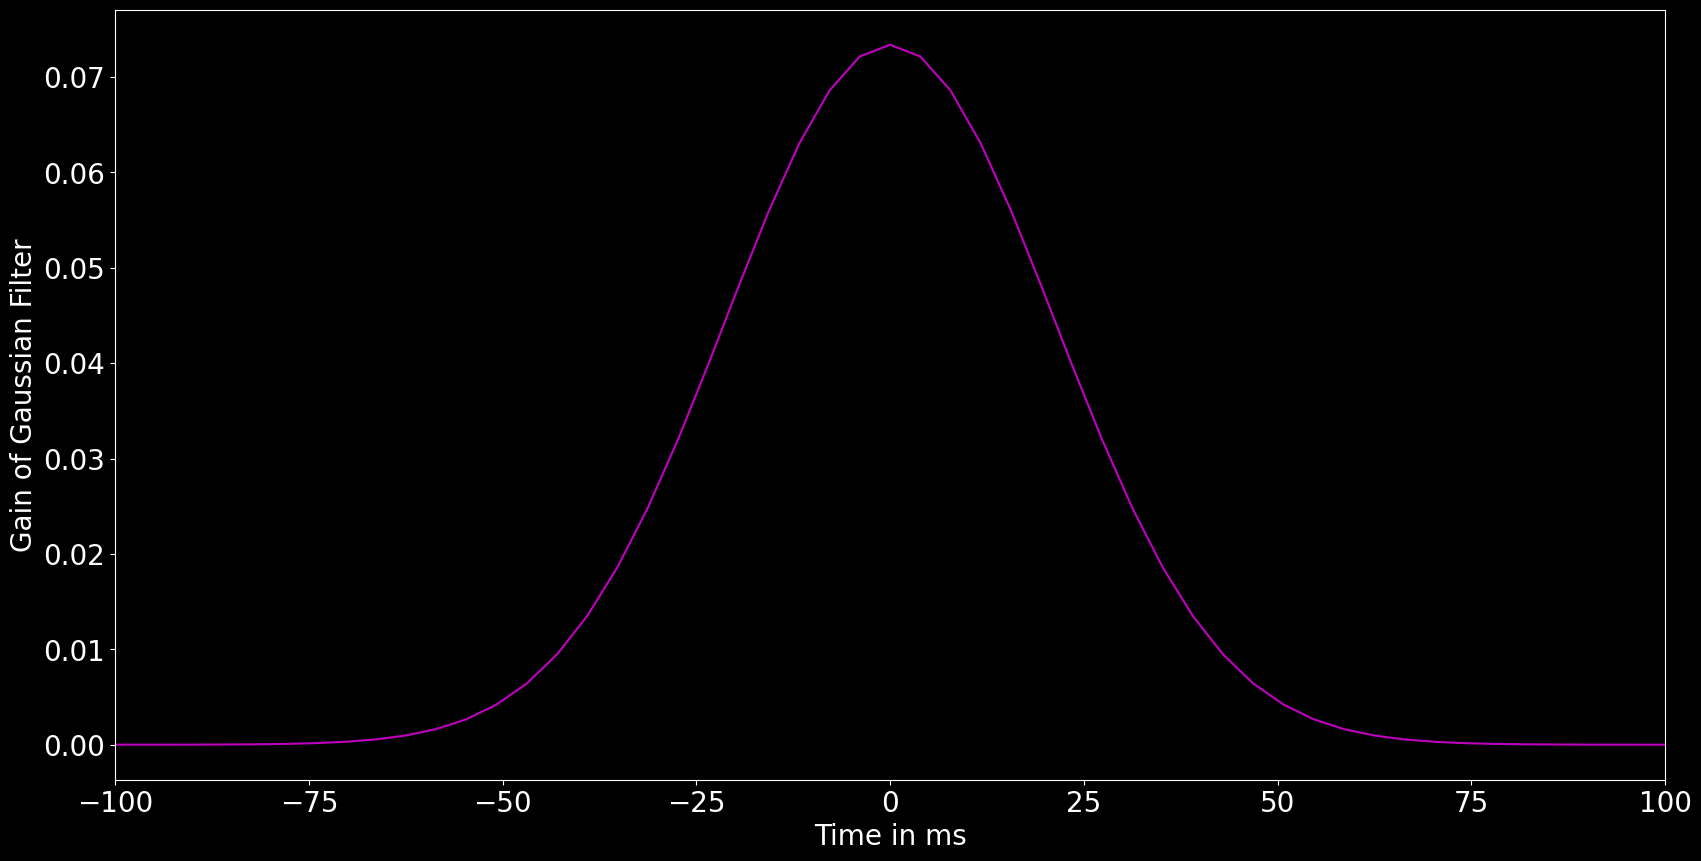

In [37]:
#generating Guassian Filter
N=100
fwhm=50
Gtime=1000*np.arange(-N,N)/srate
Gfilter=np.exp(-(4*np.log(2)*(Gtime)**2)/fwhm**2)
Gfilter=Gfilter/np.sum(Gfilter)
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.plot(Gtime,Gfilter,'m')
plt.xlabel('Time in ms',fontsize=20)
plt.ylabel('Gain of Gaussian Filter',fontsize=20)
plt.xlim(-100,100)
plt.show()

1736
1736


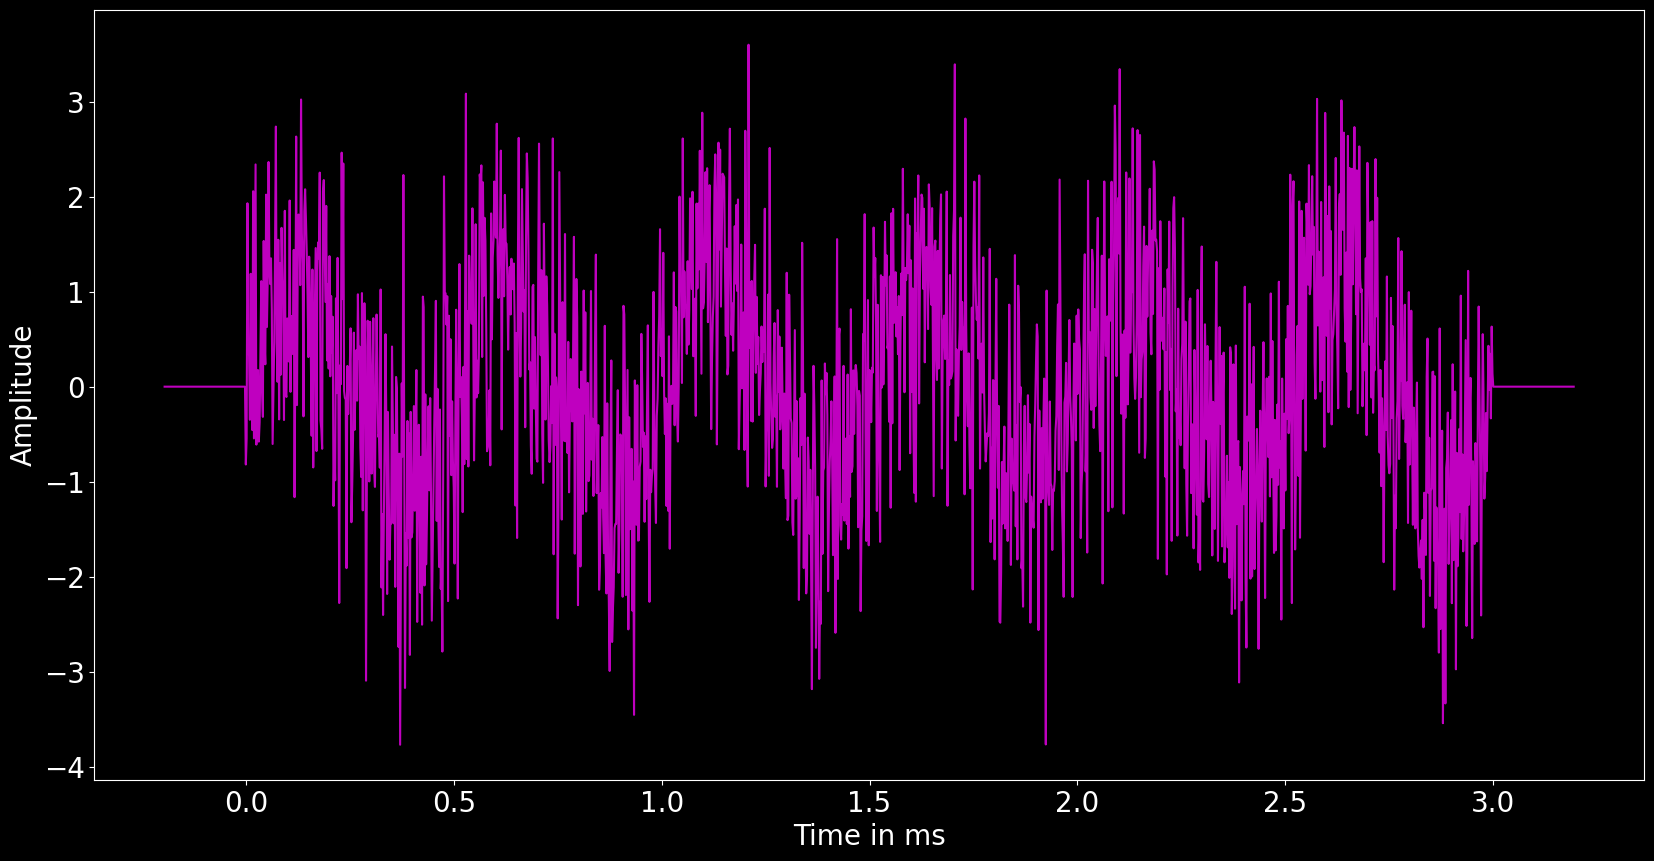

In [38]:
sig_4_filt=np.concatenate((np.zeros(N),noisy_sig,np.zeros(N))) ##adding N=100 zeros to both sides of noise
k=len(noisy_sig)
timeindex=np.concatenate((np.arange(-N,0),np.arange(0,k),np.arange(k,k+N)))
time_4_filter=timeindex/srate1
print(len(sig_4_filt))
print(len(timeindex))
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.plot(time_4_filter,sig_4_filt,'m')
plt.xlabel('Time in ms',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.show()

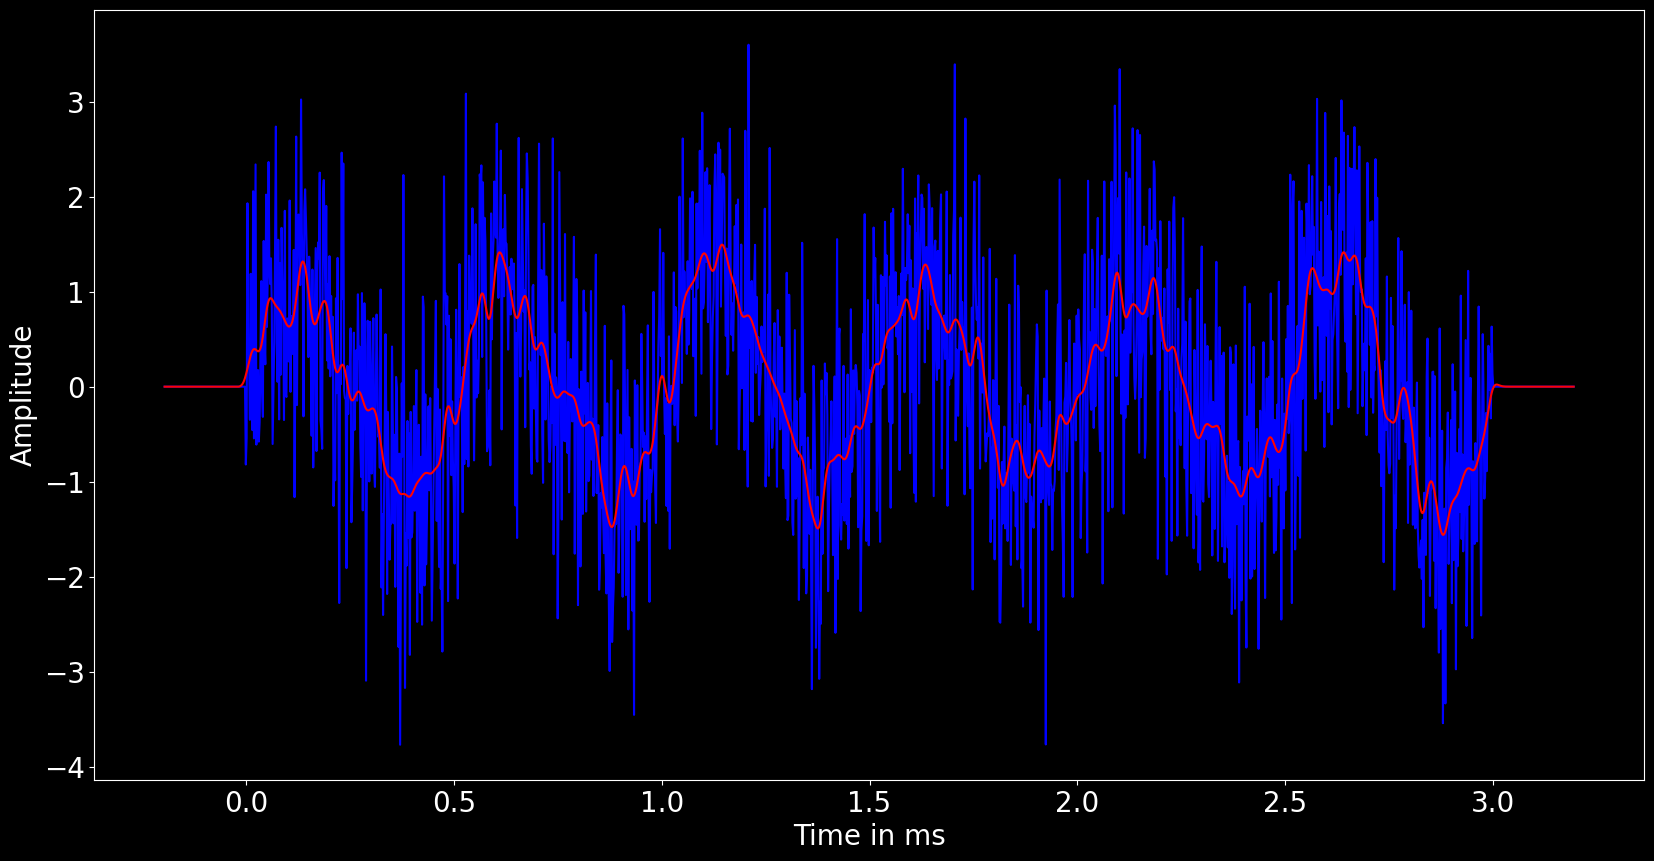

In [39]:
Gfiltered_sig=np.convolve(sig_4_filt,Gfilter,mode='same')
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.plot(time_4_filter,sig_4_filt,'b')
plt.plot(time_4_filter,Gfiltered_sig,'r')
plt.xlabel('Time in ms',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)

plt.show()

Text(0, 0.5, 'Amplitude')

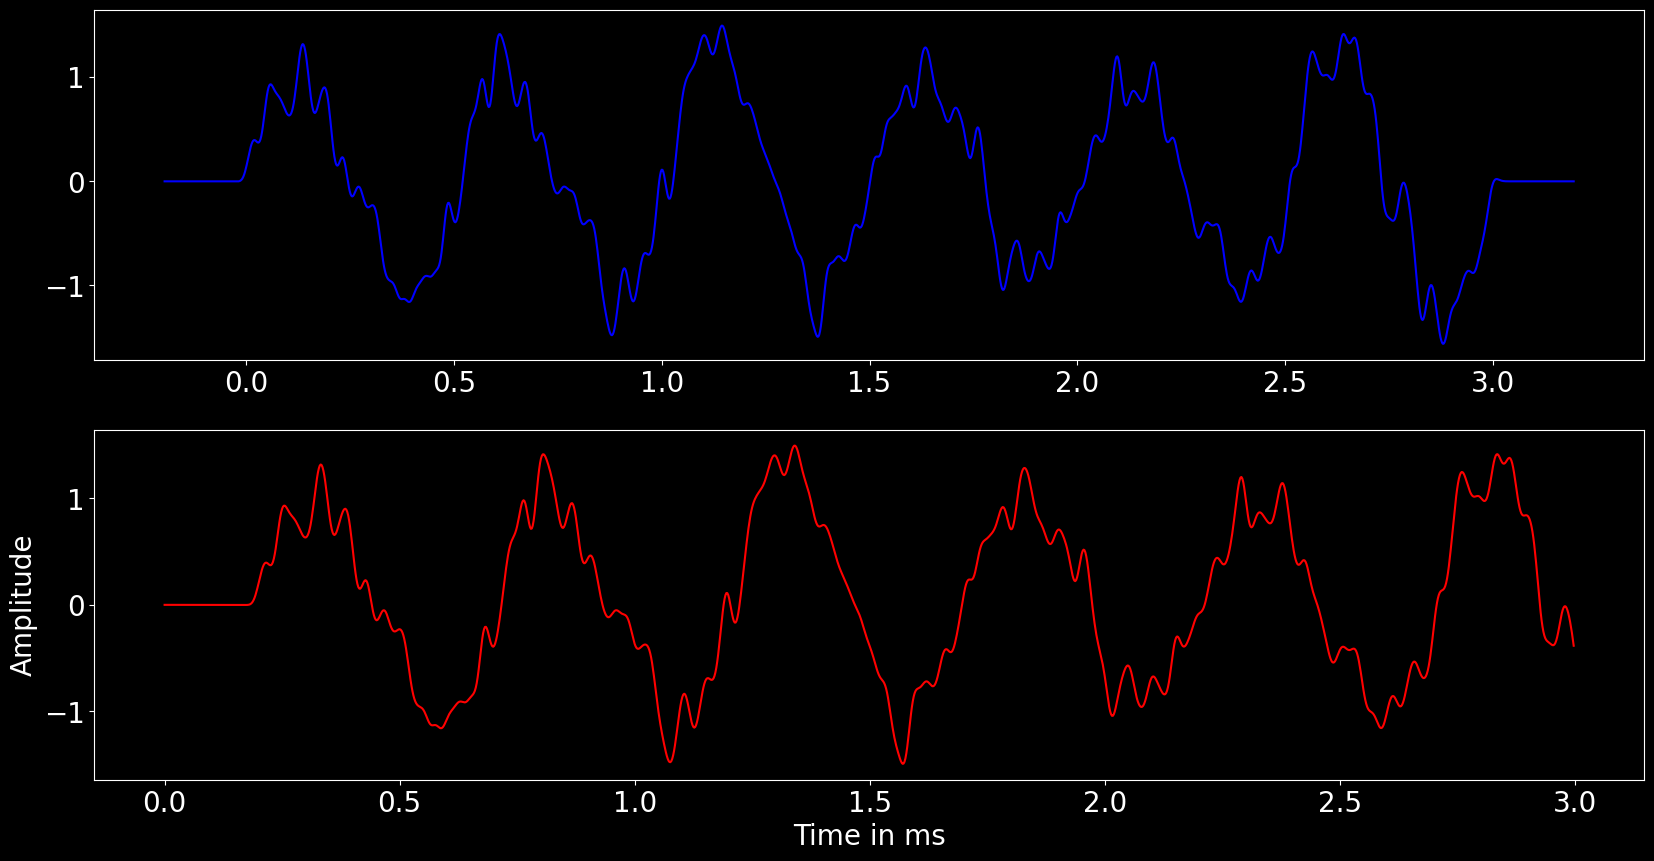

In [40]:
G_filt_clipped=Gfiltered_sig[0:k]
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.subplot(2,1,1)
plt.plot(time_4_filter,Gfiltered_sig,'b')
plt.subplot(2,1,2)
plt.plot(t,G_filt_clipped,'r')
plt.xlabel('Time in ms',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)

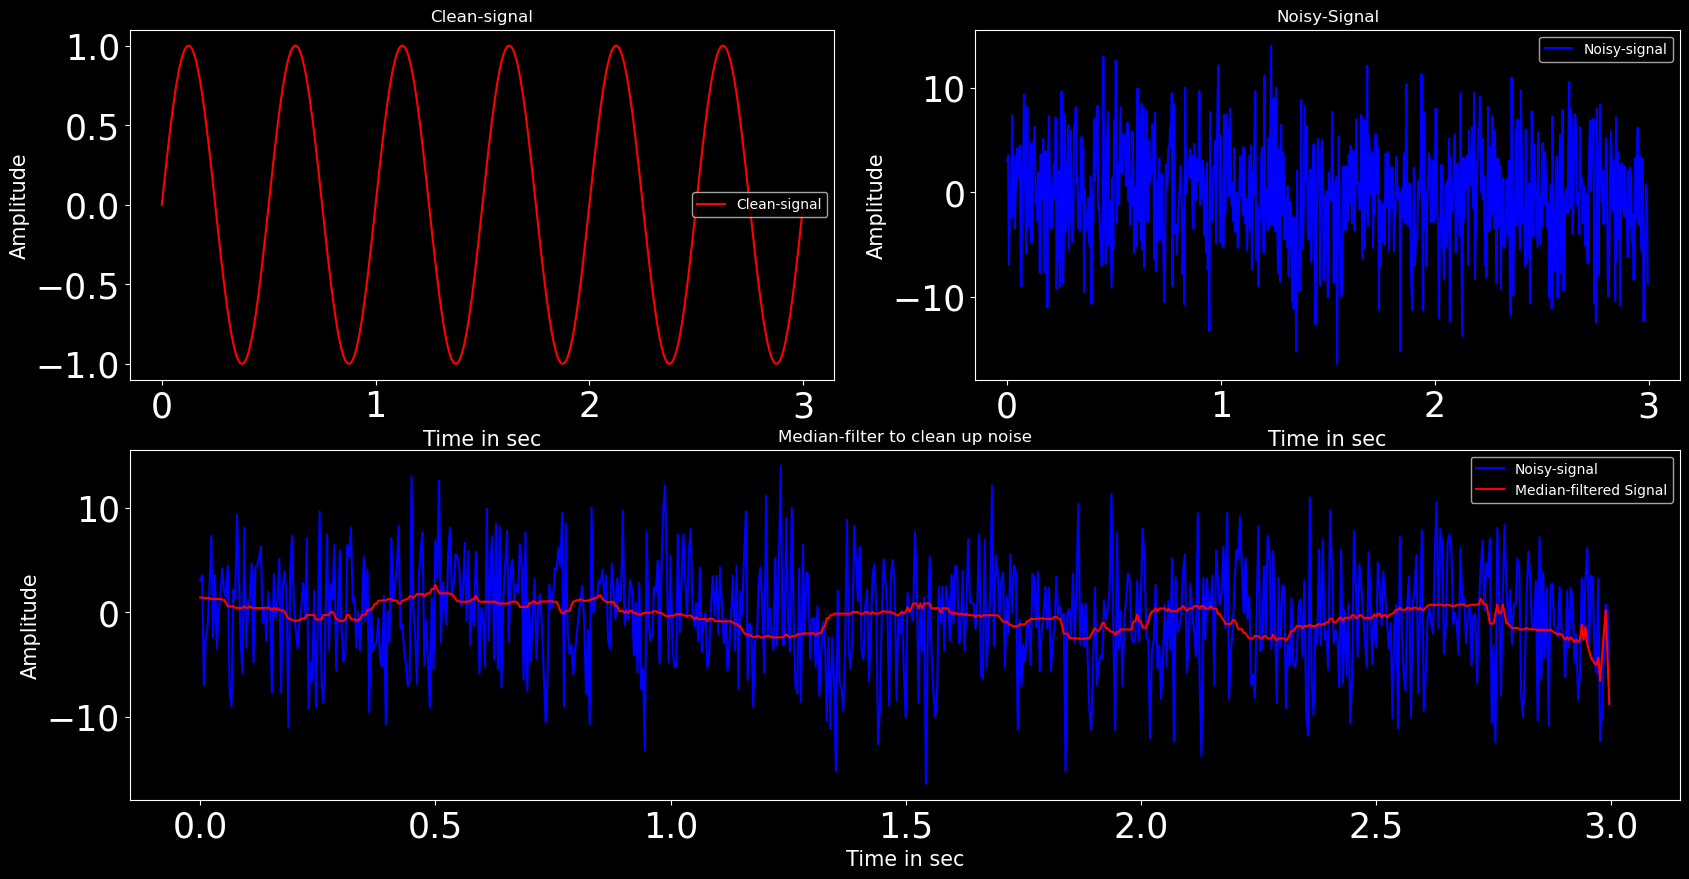

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
srate=256
t=np.arange(0,3,1/srate)
pnts=len(t)
x=np.sin(2*np.pi*2*t)
noise=5*np.random.randn(pnts)
Signal=x+noise
N=50
filt_sig=np.zeros(Signal.shape[0])
for i in range(0,Signal.shape[0]):
    filt_sig[i]=np.median(Signal[i:N+i])
plt.figure(figsize=(20,10))
style.use('dark_background')
plt.rcParams['xtick.labelsize']=25
plt.rcParams['ytick.labelsize']=25
plt.subplot(2,2,1)
plt.plot(t,x,'r',label='Clean-signal')
plt.xlabel('Time in sec',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.title('Clean-signal')
plt.legend()
plt.subplot(2,2,2)
plt.plot(t,Signal,'b',label='Noisy-signal')
plt.xlabel('Time in sec',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.title('Noisy-Signal')
plt.legend()
plt.subplot(2,1,2)
plt.plot(t,Signal,'b',label='Noisy-signal')
plt.plot(t,filt_sig,'r',label='Median-filtered Signal')
plt.xlabel('Time in sec',fontsize=15)
plt.ylabel('Amplitude',fontsize=15)
plt.title('Median-filter to clean up noise')
plt.legend(fontsize=10)
plt.show()

